In [30]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE

In [3]:
digits = load_digits()

In [10]:
digits.data.shape

(1797, 64)

In [39]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

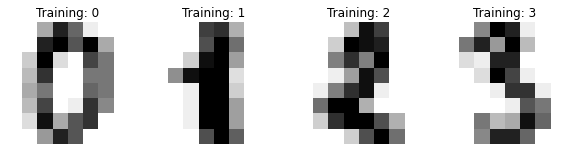

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [6]:
# flatten images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [13]:
# divide data into test and train
x_train, x_test, y_train, y_test = train_test_split(data,digits.target, test_size=0.2)

In [27]:
# declare, train, and test random forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)
print("The accuracy of this model is: ") 
print(str((rfc.score(x_test, y_test)*100).round(2)) + "%")

The accuracy of this model is: 
96.67%


In [29]:
# declare, train, and test neural network classifier
nnc = MLPClassifier()
nnc.fit(x_train, y_train)
print("The accuracy of this model is: ") 
print(str((nnc.score(x_test, y_test)*100).round(2)) + "%")

The accuracy of this model is: 
96.11%


In [40]:
# declare random forest classifier using 25 most important features in recursive feature selection
estimator = RandomForestClassifier()
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=25)
fit = rfe.fit(x_train, y_train)
# ranking = rfe.ranking_.reshape(digits.images[0].shape)
ranking = fit.ranking_
print(ranking)
print("The accuracy of this model is: ") 
print(str((rfe.score(x_test, y_test)*100).round(2)) + "%")

[40 24  1 17 14  1 19 27 33 11  1 20  6  1 21 28 35 18  5  1  1  1 16 29
 34 12  1  1  1  1  1 32 39  1  1  9  1  3  1 38 36 15  1  1  1  2  8 30
 31 23  4  1  7  1  1 25 37 26  1 13  1  1 10 22]
The accuracy of this model is: 
96.39%


In [32]:
# declare random forest classifier using 8 most important features in recursive feature selection
estimator = RandomForestClassifier()
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=8)
rfe.fit(x_train, y_train)

print("The accuracy of this model is: ") 
print(str((rfe.score(x_test, y_test)*100).round(2)) + "%")

The accuracy of this model is: 
92.5%


In [41]:
# declare random forest classifier using 25 most important features in recursive feature selection
estimator = RandomForestClassifier()
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
fit = rfe.fit(x_train, y_train)
# ranking = rfe.ranking_.reshape(digits.images[0].shape)
ranking = fit.ranking_
print(ranking)
print("The accuracy of this model is: ") 
print(str((rfe.score(x_test, y_test)*100).round(2)) + "%")

[60 44 15 34 37 18 35 48 51 32  1 40 29 10 41 47 54 38 24  9  4  1 39 49
 52 30  2 13  8 19  7 57 59  6 16 28  1 27 12 56 55 36  1  3 20 22 23 50
 53 42 26 17 31 21 11 46 58 45  5 33 14  1 25 43]
The accuracy of this model is: 
73.61%


In [ ]:
# 11, 22, 37, 43, 62
# 31, 

In [44]:
digits.images[0].shape

(8, 8)